# ECG Signal Selection

This notebook is the code used in the main script 'R_based_fitting_MF' that is extracting the 'correct' ECG 2-lead signal for each participant. 

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np
import os

from bycycle import features, cyclepoints, plts

from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.signal import detrend

from neurodsp.filt import filter_signal
from neurodsp.plts import plot_power_spectra
from neurodsp.spectral import compute_spectrum
import neurokit2 as nk

import sys
sys.path.append("../")
from scripts.funcs import *

from scipy.signal import correlate


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
#FS = sampling rate; The sampling frequency of `ecg_signal` (in Hz, i.e., samples/second).
FS = 1000

# Pull out desired signal - 'sigs[0-2]' will be ECG, ECG2 and BP
# ecg = sigs[0]


## Load File and Signal

In [3]:
CROP_MIN = 10000
CROP_MAX = 15000
WINDOW_LENGTH = 5000


In [4]:
# Data paths
dir_path = '/Users/morganfitzgerald/Projects/ecg_param/data'
files_dat = [i for i in sorted(os.listdir(dir_path)) if i.endswith('dat')]
files_hea = [i for i in sorted(os.listdir(dir_path)) if i.endswith('hea')]


In [5]:
# Assuming files_dat is a list of filenames
# Iterate over the list
for filename in files_dat:
    # Extract subject number
    sub_num = os.path.splitext(filename)[0]
    
    # Ensure the extracted part is numeric (remove leading zeros)
    sub_num = str(int(sub_num))
    
    # Define SUB_NUM variable
    SUB_NUM = sub_num
    
    # Print the result
    print(f"Subject Number for {filename}: {SUB_NUM}")

Subject Number for 0001.dat: 1
Subject Number for 0002.dat: 2
Subject Number for 0006.dat: 6
Subject Number for 0007.dat: 7
Subject Number for 0008.dat: 8
Subject Number for 0009.dat: 9
Subject Number for 0010.dat: 10
Subject Number for 0011.dat: 11
Subject Number for 0020.dat: 20


## Functions

In [6]:
from py_files.extract import extract_data, extract_metadata
from py_files.simulate_ecg_sig import simulate_ecg_signal
from py_files.find_most_similar_ecg_signal import find_most_similar_signal


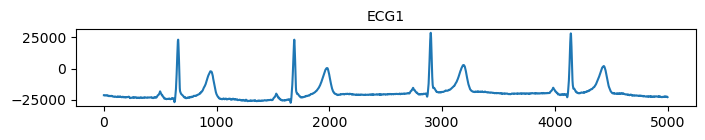

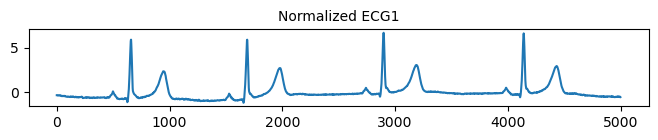

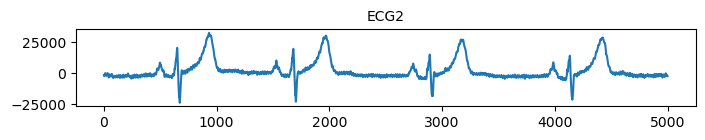

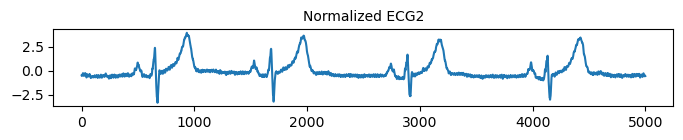

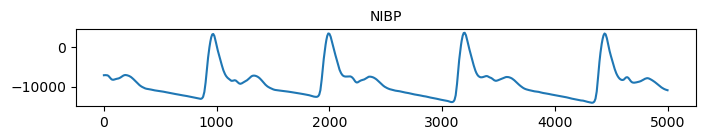

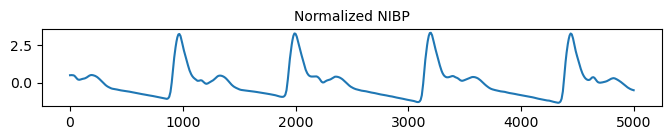

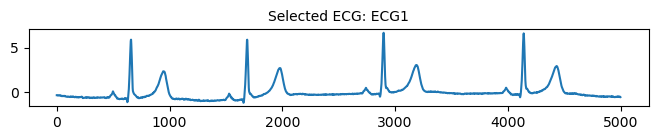

In [7]:

SUB_NUM = 4


# Extract single subject
sigs, metadata = extract_data(
    os.path.join(dir_path, files_dat[SUB_NUM]),
    os.path.join(dir_path, files_hea[SUB_NUM]),
    raw_dtype='int16'
)

CROP_MIN = 10000
CROP_MAX = 15000

# Template ECG signal
template_ecg = simulate_ecg_signal(duration=5, sampling_rate=1000, heart_rate=80, amplitude_factor=7)

# List to store normalized signals
normalized_signals = []

# Most subjects have two or three 'channels': one or two ECG and one pulse
# ECG should be one lead, and ECG2 should be two leads. We want ECG2, but suspect that it might be mislabeled on some.
# Plot each signal with its original name as the title
for ind in range(metadata['n_sigs']):
    plt.figure(ind, figsize=(8, 1))
    signal_name = metadata[f'sig{str(ind).zfill(2)}']['signal_name']
    
    # Cut the signal shorter before normalization
    cropped_signal = sigs[ind][CROP_MIN:CROP_MAX]
    
    plt.plot(cropped_signal)
    plt.title(signal_name, size=10)

    # Normalize the signal and plot in a second loop
    normalized_signal = (cropped_signal - np.mean(cropped_signal)) / np.std(cropped_signal)
    plt.figure(ind + metadata['n_sigs'], figsize=(8, 1))
    plt.plot(normalized_signal)
    plt.title(f'Normalized {signal_name}', size=10)

    # Add normalized signal to the list
    normalized_signals.append(normalized_signal)

plt.show()

# Find the most similar signal to the template using cross-correlation
selected_signal, selected_signal_name, selected_signal_index = find_most_similar_signal(template_ecg, normalized_signals, metadata)

# Plot the most similar signal with the original signal name in the title
plt.figure(figsize=(8, 1))
plt.plot(selected_signal)
plt.title(f'Selected ECG: {selected_signal_name}', size=10)
plt.show()




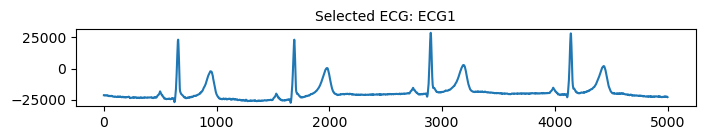

In [9]:
# Assuming 'selected_signal' is the selected signal
ecg = sigs[selected_signal_index]

# Plot the entire raw signal of the selected ECG
plt.figure(figsize=(8, 1))
plt.plot(ecg [CROP_MIN:CROP_MAX])
plt.title(f'Selected ECG: {selected_signal_name}', size=10)
plt.show()